In [14]:
from wordcloud import WordCloud

In [15]:
import pandas as pd
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col="ResponseId")

In [16]:
survey_raw_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [17]:
# NaN값 제거
temp_words = survey_raw_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [18]:
# 복수 개의 값의 구분자인 세미콜론을 공백으로, 콤마도 공백으로 변경
# 전체 문자열 내에 단어를 공백으로 구분하는 단 하나의 문자열을 만들기

temp_words = temp_words.str.replace(';', ' ').str.replace(',', ' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [19]:
# 문자열 값을 갖는 Series 내의 값을 단 하나의 문자열로 만들기
words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

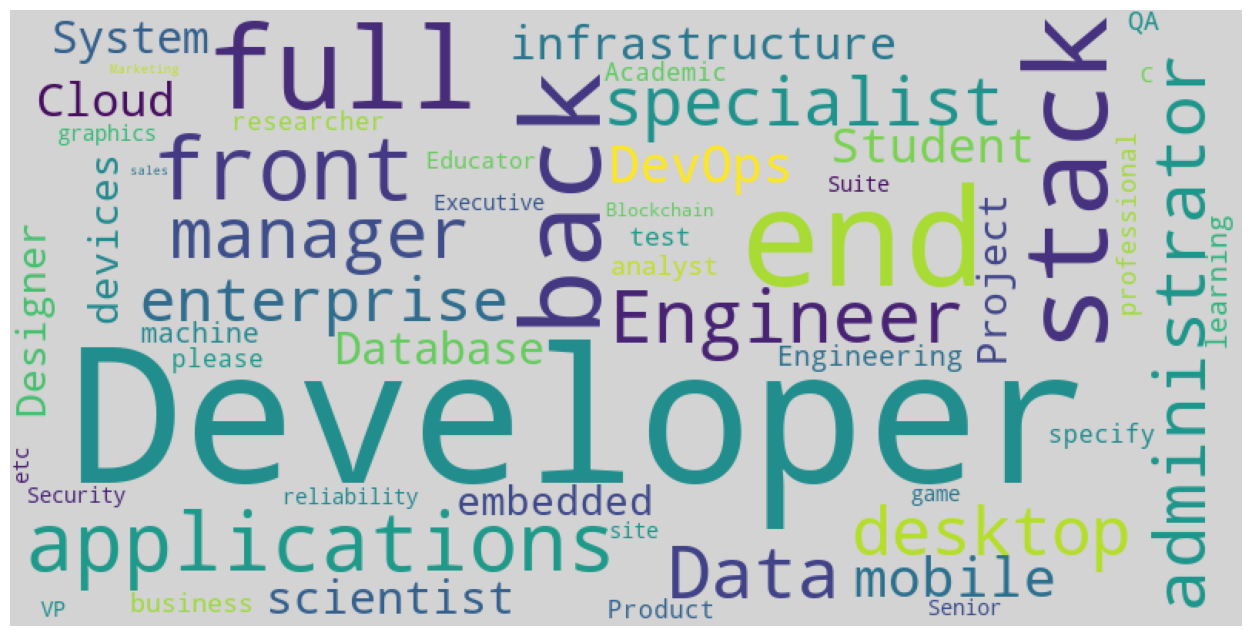

In [20]:
import matplotlib.pyplot as plt

# 한글이 포함되었다면 한글 폰트를 지정해야한다.
# font_path=['폰트 경로']
# max_font_size=60 --> 최대 글자 크기를 지정한다.
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400,
               background_color='lightgrey').generate(words)

plt.figure(figsize=(16,8))

# x, y축을 그리지 않습니다.
plt.axis("off")

# gird lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

In [21]:
# wordcloud 그림 저장하기
wc.to_file("DevType.png")